# Sistemas Nebulosos

## Atividade Prática I - Agrupamento Nebuloso

***
### Felipe Bartelt de Assis Pessoa - 2016026841
### Wanderson da Silva Maciel Filho - 2017002660

In [257]:
import numpy as np
from scipy.io import loadmat
import plotly.graph_objects as go
import sys
print('Python version: '+sys.version)
print('Numpy version: '+np.__version__, '\nPlotly version: '+__import__('plotly').__version__)

Python version: 3.9.7 (default, Oct 10 2021, 15:13:22) 
[GCC 11.1.0]
Numpy version: 1.21.2 
Plotly version: 5.3.1


In [24]:
dirichlet = np.random.default_rng().dirichlet(np.ones(4), 5) # 5x4 matrix
print(dirichlet)
np.sum(dirichlet, axis=1)

[[0.00928541 0.24076691 0.46913024 0.28081744]
 [0.61946717 0.14562779 0.20360785 0.03129719]
 [0.24019178 0.31939777 0.41465755 0.02575291]
 [0.18922034 0.36597143 0.10441942 0.34038881]
 [0.52960909 0.08729407 0.03213195 0.35096489]]


array([1., 1., 1., 1., 1.])

In [231]:
def fuzzy_cmeans(X, k, weight=2, tol=1e-3):
    n, _ = X.shape # n x m
    J = tol + 1
    membership_mat = np.random.default_rng().dirichlet(np.ones(k), n) # generates n x k matrix

    while J > tol:
        membership_mat = membership_mat ** weight
        J_old = J
        c = (membership_mat.T @ X) / np.sum(membership_mat, axis=0)[:, None] # k x m
        D = np.linalg.norm(c[:, None, :] - X, axis=2) # k x n
        J = np.sum(membership_mat.T * (D ** 2))

        if np.abs(J - J_old) < tol**2:
            print('Small improvement since last iteration')
            break
        
        sum_div = np.sum(D[:, None] / D, axis=1)
        membership_mat = (1 / (sum_div ** (2 / (weight - 1)))).T

    return c, membership_mat

In [239]:
X = loadmat('fcm_dataset.mat')['x']
c, u = fuzzy_cmeans(X, 4)
print('clusters: ', c)

Small improvement since last iteration
clusters:  [[3.00812918 3.49209289]
 [2.49387577 3.98970112]
 [4.00878282 5.01067158]
 [3.49543235 4.48892216]]


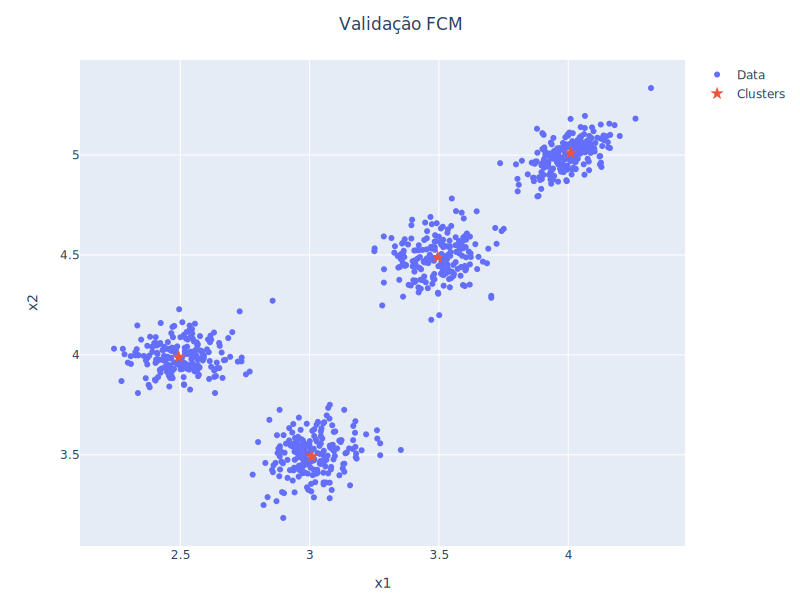

In [248]:
fig = go.Figure(go.Scatter(x=X[:, 0].flatten(), y=X[:, 1].flatten(), mode='markers', name='Data'))
fig.add_trace(go.Scatter(x=c[:, 0].flatten(), y=c[:, 1].flatten(), mode='markers', marker={'size':10, 'symbol':'star'}, name='Clusters'))
fig.update_layout(xaxis_title = 'x1', yaxis_title = 'x2', margin={'b':20, 't':60}, title='Validação FCM', title_x=0.5)
fig.show(renderer = 'svg', width = 800, height = 600)